##### _Data Visualization with Python_
---

# Bubble Chart

A bubble chart is a variation of a scatter plot that displays *three* dimensions of data. Like a scatter plot, it uses two axes to represent two numerical variables.  However, a bubble chart adds a third dimension by varying the *size* of the markers (the "bubbles").  Optionally, a *fourth* dimension can be represented by the *color* of the bubbles.

### Suitable Variable Types
* **X-axis (Independent Variable):** Numerical (interval or ratio).
* **Y-axis (Dependent Variable):** Numerical (interval or ratio).
* **Bubble Size:** Numerical (usually ratio, as size is often proportional to area or volume).
* **Bubble Color (Optional):**  Can be numerical (interval or ratio) or categorical (nominal or ordinal). If numerical, a colormap is used; if categorical, distinct colors are used.

### Use Cases
1. **Showing Relationships Between Three (or Four) Variables:** The primary use is to visualize the relationships between three variables simultaneously, where two are represented by position and the third by size.
2. **Highlighting Magnitude:** The bubble size effectively emphasizes the magnitude of the third variable. Larger bubbles draw attention.
3. **Identifying Clusters and Outliers:**  Similar to scatter plots, bubble charts can reveal clusters and outliers, but with the added dimension of size.
4. **Comparing Entities with Multiple Attributes:**  Bubble charts are useful for comparing entities (e.g., countries, companies, products) based on multiple numerical attributes.
5. **Tracking Changes Over Time (with Animation):** If you have data over time, you can create *animated* bubble charts where the bubbles move and change size, representing changes in the three variables over time.  This is famously demonstrated in Hans Rosling's Gapminder visualizations.

### Potential Pitfalls
1. **Difficult to Judge Area Accurately:**  Humans are not good at accurately judging the relative *areas* of circles.  A bubble that is twice the *area* of another might not be perceived as twice as large.  It's often better to scale the bubble size by the *radius* (or diameter) rather than the area, although this can still be misleading. Be sure to clearly communicate how size is scaled. Consider providing a legend for bubble sizes.
2. **Overplotting (Too Many Bubbles):**  With many bubbles, especially if they overlap significantly, the chart can become cluttered and difficult to read.  Solutions include:
    * **Transparency:** Making the bubbles partially transparent.
    * **Jittering:**  Adding a small amount of random noise to the x and y positions to reduce overlap.
    * **Filtering:**  Showing only a subset of the data (e.g., the largest bubbles).
3. **Correlation vs. Causation:**  As with scatter plots, a bubble chart shows correlations, not causation.
4. **Color Scale Choice (if used):**  If using color to represent a fourth variable, choose an appropriate colormap (sequential, diverging, or qualitative, depending on the data type).
5. **Zero and Negative Values:** It is hard to represent these kind of values.

### How to Create Bubble Charts?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np

# --- Synthetic Data: Country Statistics ---
np.random.seed(42)
n = 50  # Number of countries

# Simulate GDP per capita (log-normal distribution)
gdp_per_capita = np.random.lognormal(mean=8, sigma=1, size=n)  # In USD
gdp_per_capita = np.round(gdp_per_capita, 2) # Round

# Simulate life expectancy (normally distributed, with some positive correlation to GDP)
life_expectancy = 60 + 0.0005 * gdp_per_capita + np.random.normal(loc=0, scale=5, size=n)
life_expectancy = np.round(life_expectancy, 2) # Round


# Simulate population (exponential distribution - some countries very populous, most smaller)
population = np.random.exponential(scale=50_000_000, size=n)  # In people
population = population.astype(int) # Convert to integer

df_countries = pd.DataFrame({
    'Country': [f'Country {i+1}' for i in range(n)],
    'GDP per Capita': gdp_per_capita,
    'Life Expectancy': life_expectancy,
    'Population': population
})
df_countries.head()

,Country,GDP per Capita,Life Expectancy,Population
0,Country 1,4898.65,64.07,27013666
1,Country 2,2596.02,59.37,12558366
2,Country 3,5696.96,59.46,6384019
3,Country 4,13670.97,69.89,20595428
4,Country 5,2358.65,66.33,143156056


#### Bubble Charts with Matplotlib:

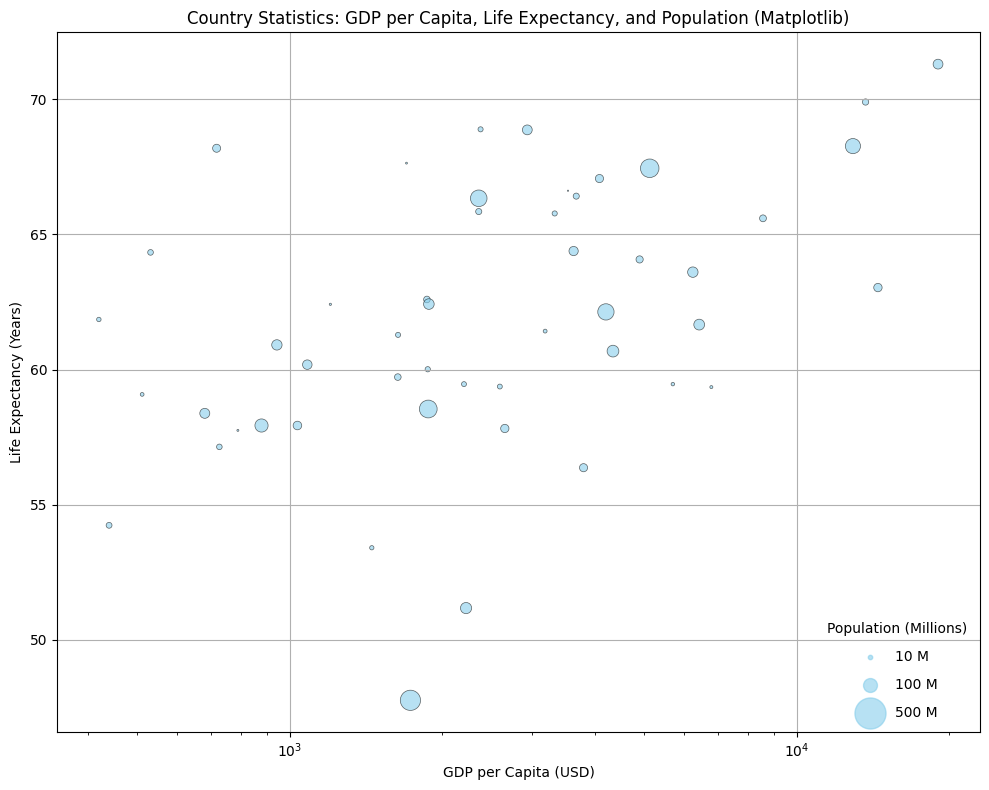

In [2]:
import matplotlib.pyplot as plt

# --- Matplotlib ---
plt.figure(figsize=(10, 8))

# Scale the population for better visualization (otherwise, bubbles might be too large/small)
#  The scaling factor is arbitrary - adjust as needed
scaled_population = df_countries['Population'] / 1_000_000

plt.scatter(x=df_countries['GDP per Capita'], y=df_countries['Life Expectancy'],
            s=scaled_population,  # Bubble size determined by scaled population
            alpha=0.6,
            color='skyblue',
            edgecolor='black',  # Add an outline to the bubbles
            linewidth=0.5)

plt.title('Country Statistics: GDP per Capita, Life Expectancy, and Population (Matplotlib)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.xscale('log')  # Use a logarithmic scale for the x-axis (GDP per capita)
plt.grid(True)

# Add a legend for bubble size (this is important for interpretability!)
# We create some dummy scatter points with known sizes for the legend
for size in [10, 100, 500]:  # Example sizes (in millions of people, after scaling)
    plt.scatter([], [], c='skyblue', alpha=0.6, s=size,
                label=str(int(size)) + ' M')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Population (Millions)', loc = "lower right")

plt.tight_layout()
plt.show()

#### Bubble Charts with Seaborn:

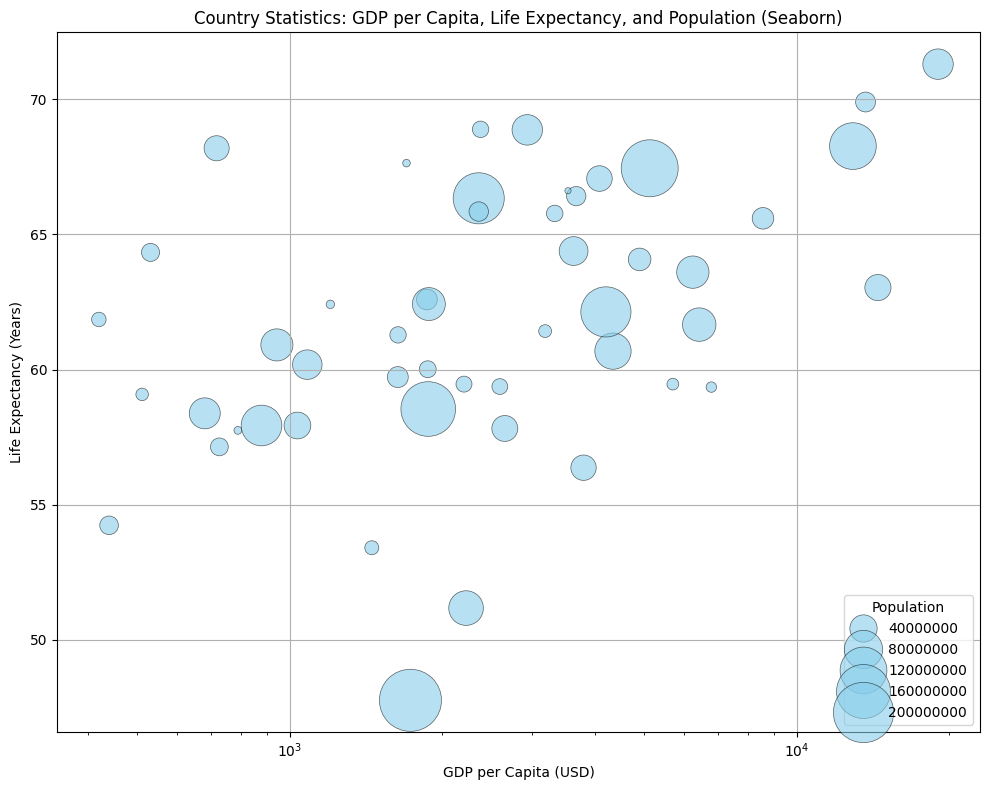

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Seaborn ---
plt.figure(figsize=(10, 8))

# Seaborn's scatterplot can directly handle size and color
sns.scatterplot(x='GDP per Capita', y='Life Expectancy', size='Population',
                data=df_countries,
                sizes=(20, 2000),  # Control the range of bubble sizes
                alpha=0.6,
                color='skyblue',
                edgecolor='black',
                linewidth=0.5)

plt.title('Country Statistics: GDP per Capita, Life Expectancy, and Population (Seaborn)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.xscale('log')
plt.grid(True)
plt.legend(title='Population', loc = "lower right")
plt.tight_layout()
plt.show()